In [31]:
import os
import keras
from keras import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib as mpl
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from skimage.io import imsave, imread
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import ndimage
from scipy.misc import imresize
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from keras.models import Model
from keras.layers import Add
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras.optimizers import Adam
from keras.models import Sequential
import sys
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks
from sklearn.metrics import confusion_matrix
import itertools
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.layers import Input, merge, Dropout, Dense, Lambda, Flatten, Activation
from keras.layers.convolutional import MaxPooling2D, Convolution2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.preprocessing import image

from keras import layers
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import SeparableConv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.engine.topology import get_source_inputs
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import _obtain_input_shape

%matplotlib inline

np.random.seed(1337)

In [2]:
resize_h=256
resize_w=256

def load_data():
    total=len(os.listdir('melanoma/'))+len(os.listdir('others/'))
    print(total)
    imgs=[]
    imgs_mask=[]
    labels=[]
    i = 0
    images = os.listdir('melanoma/')
    for image_name in images:
        image_mask_name = image_name.split('.')[0]
        image_mask_name = image_mask_name+"_segmentation.png"
        img = ndimage.imread('melanoma/'+image_name)       
        #img = cv2.resize(img, (resize_h, resize_w))
        img_mask = ndimage.imread('gt/'+image_mask_name)
        #print(size(imgs_mask))
        #img_mask = cv2.res(img_mask, (array.shape[1], array.shape[0],1))
        #img = np.multiply(img ,img_mask/255.)
        #img = imresize(img,(resize_h,resize_w))
        #ret2,th2 = cv2.threshold(img_mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        labels.append(1)
        img = img_to_array(img)
        img_mask=img_to_array(img_mask)
        img_mask=np.reshape(img_mask,(img_mask.shape[0],img_mask.shape[1],1))
        img = np.multiply(img ,img_mask/255.)
        img = imresize(img,(resize_h,resize_w))
        imgs.append(img)
        #imgs_mask.append(img_mask)
        print('Done: {0}/{1} images'.format(i, total))
        i += 1
    images = os.listdir('others/')
    for image_name in images:
        image_mask_name = image_name.split('.')[0]
        image_mask_name = image_mask_name+"_segmentation.png"
        img = ndimage.imread('others/'+image_name)       
        #img = cv2.resize(img, (resize_h, resize_w))
        img_mask = ndimage.imread('gt/'+image_mask_name)
        #print(size(imgs_mask))
        #img_mask = cv2.res(img_mask, (array.shape[1], array.shape[0],1))
        #img = np.multiply(img ,img_mask/255.)
        #img = imresize(img,(resize_h,resize_w))
        #ret2,th2 = cv2.threshold(img_mask,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        labels.append(0)
        img = img_to_array(img)
        img_mask=img_to_array(img_mask)
        img_mask=np.reshape(img_mask,(img_mask.shape[0],img_mask.shape[1],1))
        img = np.multiply(img ,img_mask/255.)
        img = imresize(img,(resize_h,resize_w))
        imgs.append(img)
        print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('out of for')
    imgs = np.array(imgs, dtype="float")
    imgs_mask = np.array(imgs_mask,dtype="float")
    labels = np.array(labels,dtype='float')
    print('Loading done.')
    return imgs, labels

X, Y = load_data()

2000


c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  from ipykernel import kernelapp as app
c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Done: 0/2000 images
Done: 1/2000 images
Done: 2/2000 images
Done: 3/2000 images
Done: 4/2000 images
Done: 5/2000 images
Done: 6/2000 images
Done: 7/2000 images
Done: 8/2000 images
Done: 9/2000 images
Done: 10/2000 images
Done: 11/2000 images
Done: 12/2000 images
Done: 13/2000 images
Done: 14/2000 images
Done: 15/2000 images
Done: 16/2000 images
Done: 17/2000 images
Done: 18/2000 images
Done: 19/2000 images
Done: 20/2000 images
Done: 21/2000 images
Done: 22/2000 images
Done: 23/2000 images
Done: 24/2000 images
Done: 25/2000 images
Done: 26/2000 images
Done: 27/2000 images
Done: 28/2000 images
Done: 29/2000 images
Done: 30/2000 images
Done: 31/2000 images
Done: 32/2000 images
Done: 33/2000 images
Done: 34/2000 images
Done: 35/2000 images
Done: 36/2000 images
Done: 37/2000 images
Done: 38/2000 images
Done: 39/2000 images
Done: 40/2000 images
Done: 41/2000 images
Done: 42/2000 images
Done: 43/2000 images
Done: 44/2000 images
Done: 45/2000 images
Done: 46/2000 images
Done: 47/2000 images
Do

c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
c:\users\ananda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Done: 375/2000 images
Done: 376/2000 images
Done: 377/2000 images
Done: 378/2000 images
Done: 379/2000 images
Done: 380/2000 images
Done: 381/2000 images
Done: 382/2000 images
Done: 383/2000 images
Done: 384/2000 images
Done: 385/2000 images
Done: 386/2000 images
Done: 387/2000 images
Done: 388/2000 images
Done: 389/2000 images
Done: 390/2000 images
Done: 391/2000 images
Done: 392/2000 images
Done: 393/2000 images
Done: 394/2000 images
Done: 395/2000 images
Done: 396/2000 images
Done: 397/2000 images
Done: 398/2000 images
Done: 399/2000 images
Done: 400/2000 images
Done: 401/2000 images
Done: 402/2000 images
Done: 403/2000 images
Done: 404/2000 images
Done: 405/2000 images
Done: 406/2000 images
Done: 407/2000 images
Done: 408/2000 images
Done: 409/2000 images
Done: 410/2000 images
Done: 411/2000 images
Done: 412/2000 images
Done: 413/2000 images
Done: 414/2000 images
Done: 415/2000 images
Done: 416/2000 images
Done: 417/2000 images
Done: 418/2000 images
Done: 419/2000 images
Done: 420/

Done: 748/2000 images
Done: 749/2000 images
Done: 750/2000 images
Done: 751/2000 images
Done: 752/2000 images
Done: 753/2000 images
Done: 754/2000 images
Done: 755/2000 images
Done: 756/2000 images
Done: 757/2000 images
Done: 758/2000 images
Done: 759/2000 images
Done: 760/2000 images
Done: 761/2000 images
Done: 762/2000 images
Done: 763/2000 images
Done: 764/2000 images
Done: 765/2000 images
Done: 766/2000 images
Done: 767/2000 images
Done: 768/2000 images
Done: 769/2000 images
Done: 770/2000 images
Done: 771/2000 images
Done: 772/2000 images
Done: 773/2000 images
Done: 774/2000 images
Done: 775/2000 images
Done: 776/2000 images
Done: 777/2000 images
Done: 778/2000 images
Done: 779/2000 images
Done: 780/2000 images
Done: 781/2000 images
Done: 782/2000 images
Done: 783/2000 images
Done: 784/2000 images
Done: 785/2000 images
Done: 786/2000 images
Done: 787/2000 images
Done: 788/2000 images
Done: 789/2000 images
Done: 790/2000 images
Done: 791/2000 images
Done: 792/2000 images
Done: 793/

Done: 1116/2000 images
Done: 1117/2000 images
Done: 1118/2000 images
Done: 1119/2000 images
Done: 1120/2000 images
Done: 1121/2000 images
Done: 1122/2000 images
Done: 1123/2000 images
Done: 1124/2000 images
Done: 1125/2000 images
Done: 1126/2000 images
Done: 1127/2000 images
Done: 1128/2000 images
Done: 1129/2000 images
Done: 1130/2000 images
Done: 1131/2000 images
Done: 1132/2000 images
Done: 1133/2000 images
Done: 1134/2000 images
Done: 1135/2000 images
Done: 1136/2000 images
Done: 1137/2000 images
Done: 1138/2000 images
Done: 1139/2000 images
Done: 1140/2000 images
Done: 1141/2000 images
Done: 1142/2000 images
Done: 1143/2000 images
Done: 1144/2000 images
Done: 1145/2000 images
Done: 1146/2000 images
Done: 1147/2000 images
Done: 1148/2000 images
Done: 1149/2000 images
Done: 1150/2000 images
Done: 1151/2000 images
Done: 1152/2000 images
Done: 1153/2000 images
Done: 1154/2000 images
Done: 1155/2000 images
Done: 1156/2000 images
Done: 1157/2000 images
Done: 1158/2000 images
Done: 1159/

Done: 1474/2000 images
Done: 1475/2000 images
Done: 1476/2000 images
Done: 1477/2000 images
Done: 1478/2000 images
Done: 1479/2000 images
Done: 1480/2000 images
Done: 1481/2000 images
Done: 1482/2000 images
Done: 1483/2000 images
Done: 1484/2000 images
Done: 1485/2000 images
Done: 1486/2000 images
Done: 1487/2000 images
Done: 1488/2000 images
Done: 1489/2000 images
Done: 1490/2000 images
Done: 1491/2000 images
Done: 1492/2000 images
Done: 1493/2000 images
Done: 1494/2000 images
Done: 1495/2000 images
Done: 1496/2000 images
Done: 1497/2000 images
Done: 1498/2000 images
Done: 1499/2000 images
Done: 1500/2000 images
Done: 1501/2000 images
Done: 1502/2000 images
Done: 1503/2000 images
Done: 1504/2000 images
Done: 1505/2000 images
Done: 1506/2000 images
Done: 1507/2000 images
Done: 1508/2000 images
Done: 1509/2000 images
Done: 1510/2000 images
Done: 1511/2000 images
Done: 1512/2000 images
Done: 1513/2000 images
Done: 1514/2000 images
Done: 1515/2000 images
Done: 1516/2000 images
Done: 1517/

Done: 1831/2000 images
Done: 1832/2000 images
Done: 1833/2000 images
Done: 1834/2000 images
Done: 1835/2000 images
Done: 1836/2000 images
Done: 1837/2000 images
Done: 1838/2000 images
Done: 1839/2000 images
Done: 1840/2000 images
Done: 1841/2000 images
Done: 1842/2000 images
Done: 1843/2000 images
Done: 1844/2000 images
Done: 1845/2000 images
Done: 1846/2000 images
Done: 1847/2000 images
Done: 1848/2000 images
Done: 1849/2000 images
Done: 1850/2000 images
Done: 1851/2000 images
Done: 1852/2000 images
Done: 1853/2000 images
Done: 1854/2000 images
Done: 1855/2000 images
Done: 1856/2000 images
Done: 1857/2000 images
Done: 1858/2000 images
Done: 1859/2000 images
Done: 1860/2000 images
Done: 1861/2000 images
Done: 1862/2000 images
Done: 1863/2000 images
Done: 1864/2000 images
Done: 1865/2000 images
Done: 1866/2000 images
Done: 1867/2000 images
Done: 1868/2000 images
Done: 1869/2000 images
Done: 1870/2000 images
Done: 1871/2000 images
Done: 1872/2000 images
Done: 1873/2000 images
Done: 1874/

In [3]:
np.save( 'images.npy', X)
np.save('labels.npy', Y)

In [14]:
X = np.load('../imgs_classify.npy')
Y = np.load('../labels.npy')

In [15]:
X[1].shape

(256, 256, 3)

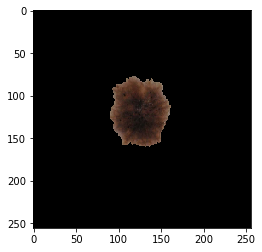

In [16]:
plt.imshow(X[1])

In [17]:
np.unique(Y)

array([ 0.,  1.])

In [18]:
np.unique(X)

array([  0.00000000e+00,   1.67186529e-16,   2.22915381e-16, ...,
         9.99998152e-01,   9.99998689e-01,   1.00000000e+00])

In [19]:
(trainX, testX, trainY, testY) = train_test_split(X,Y, test_size=0.20, random_state=42)

In [20]:
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,name = "Cf.png",
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    fig = plt.gcf()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(name)
    plt.show()

In [43]:
def residual_network(x):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.Activation('relu')(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.Activation('relu')(y)

        return y

    # conv1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 128, 256, _project_shortcut=project_shortcut)

    # conv3
    for i in range(4):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv4
    for i in range(6):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 1024, _strides=strides)

    # conv5
    for i in range(3):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 1024, 2048, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1, activation='sigmoid', name='predictions')(x)

    return x


In [44]:
cardinality = 1
image_tensor = layers.Input(shape=(256, 256, 3))
network_output = residual_network(image_tensor)
  
resnext = models.Model(inputs=[image_tensor], outputs=[network_output])
print(resnext.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 128, 64) 9472        input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 128, 128, 64) 256         conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 64) 0           batch_normalization_8[0][0]      
__________________________________________________________________________________________________
max_poolin

In [45]:
resnext.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy',f1_score,recall,precision])

In [46]:
model_checkpoint2 = ModelCheckpoint('resnext_classification2.hdf5',monitor = 'loss', verbose = 1,save_best_only=True)

In [47]:
classifier = resnext.fit(trainX,trainY, batch_size = 8, epochs = 10, verbose = True, validation_data = (testX, testY),callbacks=[TensorBoard(log_dir='/tmp/gated_cnn_autoencoder', histogram_freq=0,write_graph=True)],class_weight={0: 1, 1: 10})

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 4014s 3s/step - loss: 2.0116 - acc: 0.5000 - f1_score: nan - recall: 0.6954 - precision: 0.2564 - val_loss: 1.8218 - val_acc: 0.5400 - val_f1_score: nan - val_recall: 0.8800 - val_precision: 0.3030
Epoch 2/10
1600/1600 [==============================] - 4355s 3s/step - loss: 1.4790 - acc: 0.5206 - f1_score: nan - recall: 0.7007 - precision: 0.2657 - val_loss: 0.4316 - val_acc: 0.8000 - val_f1_score: nan - val_recall: 0.1517 - val_precision: 0.2133
Epoch 3/10
  80/1600 [>.............................] - ETA: 1:05:30 - loss: 0.7341 - acc: 0.7875 - f1_score: nan - recall: 0.6000 - precision: 0.3333

KeyboardInterrupt: 

In [48]:
prediction = resnext.predict(testX)

In [49]:
prediction = prediction >= 0.6

In [50]:
conf_matrix = confusion_matrix(testY,prediction)

In [51]:
class_names = ['Non-Melanoma', 'Melanoma']

Normalized confusion matrix
[[ 0.96273292  0.03726708]
 [ 0.8974359   0.1025641 ]]


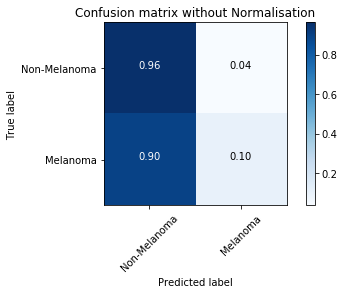

In [52]:
plot_confusion_matrix(conf_matrix, classes=class_names,normalize= True,
                      name = "NB_Confusion_matrix_without_normalisation.png",
                      title='Confusion matrix without Normalisation')